In [1]:
import os
import glob
from tqdm import tqdm

import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors

from astropy.io import fits

os.environ["PYSYN_CDBS"]='/Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds'
import pysynphot as S

from Cthulhu.misc import read_cross_section_file
from Cthulhu.core import summon, compute_cross_section
from Cthulhu.VALD import process_VALD_file

/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


The following three cells are what I used to generate my 1 nbar, 1000 K cross sections for the atomic species of interest in our work. They take quite a while to run and require a bit of set-up to make happen. In particular, the atomic cross sections require that you get a VALD account and request all the relevant datasets first. I have gone ahead and saved the results of all of this rigmarole out into cross-sections.npy, which I have supplied alongside this notebook. Feel free to skip the next three cells and simply load the numpy dictionary that I have provided, unless you want to change the cross section data at all, in which case more power to you.

Due to the size of the full cross-section dict, I cannot upload that file to GitHub. So if you want to remake the plot of GJ 367's spectrum, you will have to produce the cross-sections yourself. That is unfortunate. You can still make every other plot in the paper though, just comment out any sections that reference the full_cross_dict variable.

In [6]:
### GETTING ATOMIC CROSS-SECTIONS FROM THE OLD ONE ###
atoms = ('S','C','O','Na','K')
database = 'VALD'
for atom in tqdm(atoms, desc='Computing atomic cross-sections with Cthulhu...'):
    for state, state_str in zip((1,2,3,),('I','II','III',)):
        try:
            nu_min = 10000                  # 1/cm
            nu_max = 100000                 # 1/cm
            process_VALD_file(species = atom, ionization_state = state, VALD_data_dir = './VALD_Line_Lists/')
            summon(database=database, species = atom, VALD_data_dir='./VALD_Line_Lists/', ionization_state = state)

            P = 1e-9                        # Pressure in bars
            T = 1000.0                      # Temperature in Kelvin
            input_directory = './input/'    # Top level directory containing line lists

            compute_cross_section(database=database, species = atom, pressure = P,
                                    temperature = T, input_dir = input_directory,
                                    ionization_state = state, nu_out_min=nu_min, nu_out_max=nu_max,
                                    verbose=True, N_cores=7)
        except TypeError:
            print("Hit exception on ", atom, state_str)

Computing atomic cross-sections with Cthulhu...:   0%|          | 0/5 [00:00<?, ?it/s]

This file took 0.3 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: S 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 3.59793862800052 s
Pre-computation steps complete
Generating cross section for S I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 20543 transitions in 0.047175048000099196 s

Total runtime: 11.515795497 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: S 
Ionization State: 2

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 0.1000328289992467 s
Pre-computation steps complete
Generating cross section for S II at P = 1e-09 bar, T =

Computing atomic cross-sections with Cthulhu...:  20%|██        | 1/5 [00:27<01:50, 27.60s/it]

Total runtime: 7.450043699999696 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: C 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 0.12141423299999587 s
Pre-computation steps complete
Generating cross section for C I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 460 transitions in 0.004574909999973897 s

Total runtime: 7.869817586999488 s
This file took 0.1 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: C 
Ionization State: 2

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 2.8426359740005864 s
Pre-computation steps complete
Generating cro

Computing atomic cross-sections with Cthulhu...:  40%|████      | 2/5 [00:54<01:21, 27.30s/it]

Total runtime: 7.900074258999666 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: O 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 0.07608378900022217 s
Pre-computation steps complete
Generating cross section for O I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 304 transitions in 0.002108050000060757 s

Total runtime: 7.535600549000264 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: O 
Ionization State: 2

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 0.4238456960001713 s
Pre-computation steps complete
Generating cro

Computing atomic cross-sections with Cthulhu...:  60%|██████    | 3/5 [01:18<00:51, 25.88s/it]

Total runtime: 8.272462513999926 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: Na 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 13.132800047999808 s
Pre-computation steps complete
Generating cross section for Na I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 144 transitions in 0.4088348830000541 s

Total runtime: 21.393247583999255 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: Na 
Ionization State: 2

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 15.34720798499984 s
Pre-computation steps complete
Generating cro

Computing atomic cross-sections with Cthulhu...:  80%|████████  | 4/5 [02:57<00:54, 54.40s/it]

Total runtime: 52.03430058699996 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: K 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 18.73801698099942 s
Pre-computation steps complete
Generating cross section for K I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 209 transitions in 0.565772255000411 s

Total runtime: 27.02004727199983 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: K 
Ionization State: 2

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 79.39169446399956 s
Pre-computation steps complete
Generating cross sec

Computing atomic cross-sections with Cthulhu...: 100%|██████████| 5/5 [05:34<00:00, 66.82s/it]

Total runtime: 23.03872010899977 s


In [7]:
### GETTING THE CROSS SECTIONS TO USE FOR THE REST OF THIS NOTEBOOK ###
absorption_dict = {}
full_cross_dict = {}

P = 1e-9
T = 1000


atoms = ('C','O','Na','S','K')
masses = (12.011,15.999,22.990,32.065,39.098)
database = 'VALD'
for k in tqdm(range(len(atoms)),desc='Getting atomic cross sections...'):
    for state, state_str in zip((1,2,3,),('_I','_II','_III',)):
        try:
            atom = atoms[k]
            mass = masses[k]
            
            # These read out in 1/cm, cm^2
            nu, sigma = read_cross_section_file(species=atom,database=database,ionization_state=state,
                                                filename=atom+state_str+"_T"+"{:.1F}".format(T)+"K_log_P"+str(round(np.log10(P),1))+"_H2-He_sigma.txt")

            # Convert wavenumbers in 1/cm to wavelengths in micron
            waves = np.asarray([10*1000/i for i in nu]) # in um

            full_cross_dict[atom+state_str] = [waves,sigma,mass]

            # Take the strongest line available on the 0.1-10 um range,
            # but bin it down to comparable to resolution elements.
            max_index = np.argmax(sigma)
            if atom+state_str == 'S_I':
                # Hardcoding to pull on the 180.7311 nm line instead, since it is NIST-verified
                max_index = (np.abs(waves - 0.1807311)).argmin()
            max_wave = waves[max_index]

            # For the C, O, S lines, I'm opting for a resolution element of ~0.2 AA.
            # The COS grisms and STIS Echelles can reach dispersions of 0.01 AA per pixel,
            # but I want to bin at least 10 pixels to increase SNR.
            lower_wave = max_wave - 0.00001 # - 0.1 AA
            upper_wave = max_wave + 0.00001 # + 0.1 AA

            # For the Na and K lines, I'm going for 2 nm instead.
            # WFC3/UVIS, WFC3/IR, and STIS/IR M/L grisms reach similar or smaller dispersions,
            # and of course you want some binning for SNR.
            if atom in ("Na","K"):
                lower_wave = max_wave - 0.001 # - 1nm
                upper_wave = max_wave + 0.001 # + 1nm

            upper_index = (np.abs(waves - lower_wave)).argmin()
            lower_index = (np.abs(waves - upper_wave)).argmin()
            print("Getting cross section over {:.0F} indices from wavelengths {:.3F} to {:.3F} AA.".format(np.abs(upper_index - lower_index),
                                                                                                                lower_wave*1e4,
                                                                                                                upper_wave*1e4))
            max_sigma = sigma[lower_index:upper_index] #[max_index-index_width:max_index+index_width]
            max_waves = waves[lower_index:upper_index] #[max_index-index_width:max_index+index_width]
                
            # Define the bandpass in micron
            wmin, wmax = (np.min(max_waves),np.max(max_waves))
            band = wmax - wmin

            # Retrieve the average cross-section on this range
            avg_sig = -1*np.trapz(max_sigma,x=max_waves)/band

            sec = avg_sig

            #sec = np.mean(max_sigma)
            wave = np.median(max_waves)
            hw = 0.5*(np.max(max_waves)-np.min(max_waves))

            print("Maximum cross section for {} at index {}, wavenumber {:.0F} cm^-1, wavelength {:.0F} nm.".format(atom+state_str,
                                                                                                                    max_index,
                                                                                                                    (10*1000)/wave,
                                                                                                                    wave*1000))
            absorption_dict[atom+state_str] = [wave,sec,hw,mass]
        except:
            print("Hit exception on ", atom, state_str)

Getting atomic cross sections...:   0%|          | 0/5 [00:00<?, ?it/s]

Getting cross section over 728 indices from wavelengths 1656.908 to 1657.108 AA.
Maximum cross section for C_I at index 5034974, wavenumber 60350 cm^-1, wavelength 166 nm.
Getting cross section over 1121 indices from wavelengths 1335.608 to 1335.808 AA.
Maximum cross section for C_II at index 6486668, wavenumber 74867 cm^-1, wavelength 134 nm.


Getting atomic cross sections...:  20%|██        | 1/5 [00:33<02:15, 33.96s/it]

Getting cross section over 548 indices from wavelengths 1908.634 to 1908.834 AA.
Maximum cross section for C_III at index 4239075, wavenumber 52391 cm^-1, wavelength 191 nm.
Getting cross section over 1180 indices from wavelengths 1302.068 to 1302.268 AA.
Maximum cross section for O_I at index 6679501, wavenumber 76795 cm^-1, wavelength 130 nm.
Getting cross section over 328 indices from wavelengths 2470.988 to 2471.188 AA.
Maximum cross section for O_II at index 3046801, wavenumber 40468 cm^-1, wavelength 247 nm.


Getting atomic cross sections...:  40%|████      | 2/5 [01:07<01:40, 33.52s/it]

Getting cross section over 720 indices from wavelengths 1666.050 to 1666.250 AA.
Maximum cross section for O_III at index 5001861, wavenumber 60019 cm^-1, wavelength 167 nm.
Getting cross section over 5762 indices from wavelengths 5881.582 to 5901.582 AA.
Maximum cross section for Na_I at index 697337, wavenumber 16973 cm^-1, wavelength 589 nm.
Getting cross section over 20898 indices from wavelengths 3083.629 to 3103.629 AA.
Maximum cross section for Na_II at index 2232450, wavenumber 32325 cm^-1, wavelength 309 nm.


Getting atomic cross sections...:  60%|██████    | 3/5 [01:45<01:11, 35.56s/it]

Getting cross section over 40182 indices from wavelengths 2221.021 to 2241.021 AA.
Maximum cross section for Na_III at index 3482252, wavenumber 44823 cm^-1, wavelength 223 nm.
Getting cross section over 612 indices from wavelengths 1807.211 to 1807.411 AA.
Maximum cross section for S_I at index 4533082, wavenumber 55331 cm^-1, wavelength 181 nm.
Getting cross section over 1260 indices from wavelengths 1259.419 to 1259.619 AA.
Maximum cross section for S_II at index 6939539, wavenumber 79395 cm^-1, wavelength 126 nm.


Getting atomic cross sections...:  80%|████████  | 4/5 [02:17<00:34, 34.46s/it]

Getting cross section over 1402 indices from wavelengths 1193.941 to 1194.141 AA.
Maximum cross section for S_III at index 7374922, wavenumber 83749 cm^-1, wavelength 119 nm.
Getting cross section over 3402 indices from wavelengths 7657.007 to 7677.007 AA.
Maximum cross section for K_I at index 304290, wavenumber 13043 cm^-1, wavelength 767 nm.
Getting cross section over 11406 indices from wavelengths 4177.412 to 4197.412 AA.
Maximum cross section for K_II at index 1388110, wavenumber 23881 cm^-1, wavelength 419 nm.


Getting atomic cross sections...: 100%|██████████| 5/5 [02:53<00:00, 34.75s/it]

Getting cross section over 53273 indices from wavelengths 1927.620 to 1947.620 AA.
Maximum cross section for K_III at index 4160971, wavenumber 51611 cm^-1, wavelength 194 nm.


In [8]:
# Make binned_down absorption dict.
bin_cross_dict = {}
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    wave, sigma, mass = full_cross_dict[spec]
    wave = np.array([i for i in list(reversed(wave))])
    sigma = np.array([i for i in list(reversed(sigma))])

    # Get binned down version, where binning elements are 0.1 AA = 0.01 nm < 300 nm, and 2 nm > 300 nm.
    lam_step = 1e-5
    bin_w, bin_sig = [],[]
    lam0 = 0.1
    j = 0
    while lam0 < 1.0:
        ok = (wave>lam0) & (wave<lam0+lam_step)
        bin_w.append(np.mean(wave[ok]))
        bin_sig.append(np.mean(sigma[ok]))
        lam0 += lam_step
        if lam0 > 0.3:
            lam_step = 2e-3
        j += 1
        if j % 10000 == 0:
            print(j, lam0, lam_step)
            j = 0

    bin_cross_dict[spec] = [np.array(bin_w),np.array(bin_sig),mass]

Fixing cross sections...:   0%|          | 0/15 [00:00<?, ?it/s]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:   7%|▋         | 1/15 [06:33<1:31:45, 393.28s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  13%|█▎        | 2/15 [13:21<1:27:04, 401.92s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  20%|██        | 3/15 [19:47<1:18:56, 394.68s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  27%|██▋       | 4/15 [26:31<1:13:04, 398.62s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  33%|███▎      | 5/15 [32:45<1:04:55, 389.60s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  40%|████      | 6/15 [38:53<57:19, 382.11s/it]  

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  47%|████▋     | 7/15 [44:46<49:42, 372.75s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  53%|█████▎    | 8/15 [50:54<43:19, 371.30s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  60%|██████    | 9/15 [57:07<37:11, 371.86s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  67%|██████▋   | 10/15 [1:03:11<30:47, 369.46s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  73%|███████▎  | 11/15 [1:09:14<24:29, 367.34s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  80%|████████  | 12/15 [1:15:06<18:08, 362.69s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  87%|████████▋ | 13/15 [1:21:08<12:04, 362.34s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  93%|█████████▎| 14/15 [1:27:07<06:01, 361.49s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...: 100%|██████████| 15/15 [1:33:21<00:00, 373.42s/it]


In [9]:
### CONFIRMING I GOT WHAT I NEEDED AND SAVING OUT ###
for key in list(absorption_dict.keys()):
    wave, sig, hw, mass = absorption_dict[key]
    print('{}: peaks at {:.0F} nm with cross-section {:.2E} cm^2'.format(key,1000*wave,sig))

filename = 'cross-sections-I-II-III.npy'
np.save(filename,absorption_dict)
filename = 'cross-sections-I-II-III-bin.npy'
np.save(filename,bin_cross_dict)
filename = 'cross-sections-I-II-III-full.npy'
np.save(filename,full_cross_dict)

C_I: peaks at 166 nm with cross-section 9.70E-15 cm^2
C_II: peaks at 134 nm with cross-section 7.33E-15 cm^2
C_III: peaks at 191 nm with cross-section 3.03E-20 cm^2
O_I: peaks at 130 nm with cross-section 2.64E-15 cm^2
O_II: peaks at 247 nm with cross-section 1.29E-23 cm^2
O_III: peaks at 167 nm with cross-section 1.64E-20 cm^2
Na_I: peaks at 589 nm with cross-section 1.41E-14 cm^2
Na_II: peaks at 309 nm with cross-section 2.63E-180 cm^2
Na_III: peaks at 223 nm with cross-section 2.01E-244 cm^2
S_I: peaks at 181 nm with cross-section 1.56E-14 cm^2
S_II: peaks at 126 nm with cross-section 8.47E-16 cm^2
S_III: peaks at 119 nm with cross-section 5.25E-16 cm^2
K_I: peaks at 767 nm with cross-section 1.76E-14 cm^2
K_II: peaks at 419 nm with cross-section 1.10E-115 cm^2
K_III: peaks at 194 nm with cross-section 3.30E-136 cm^2


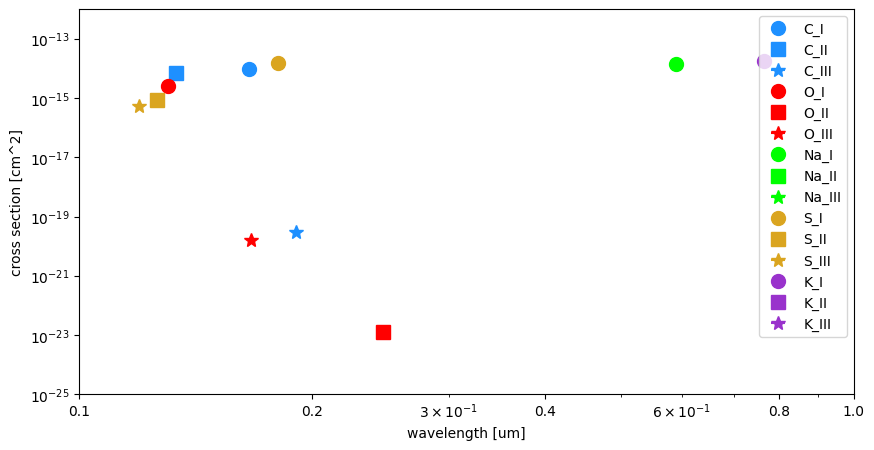

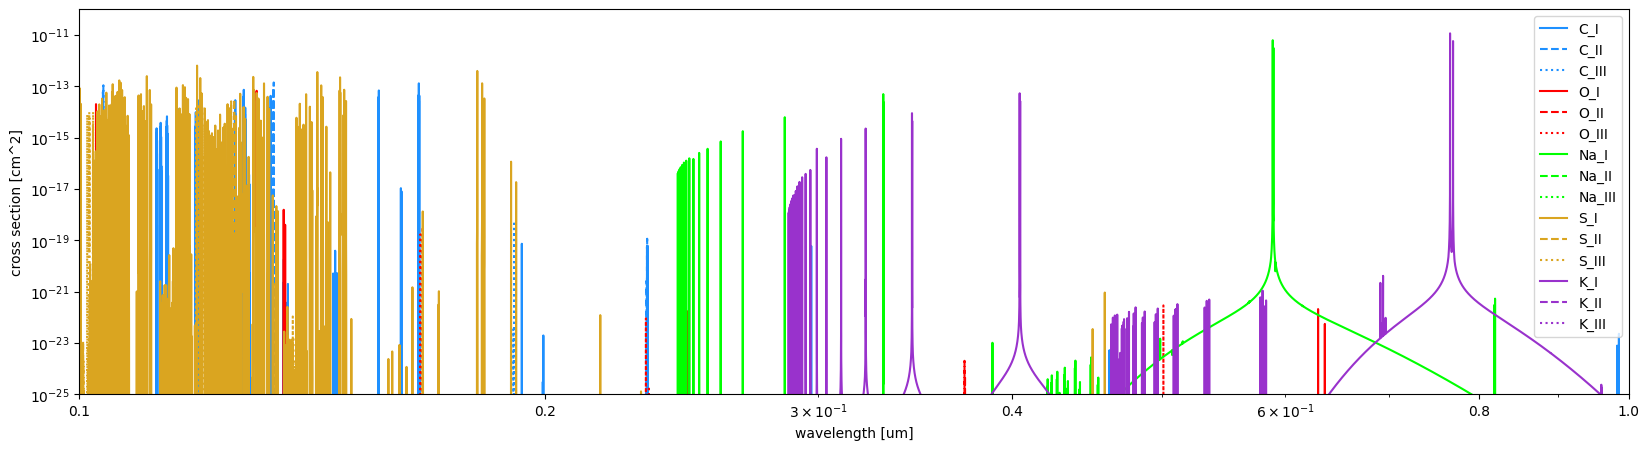

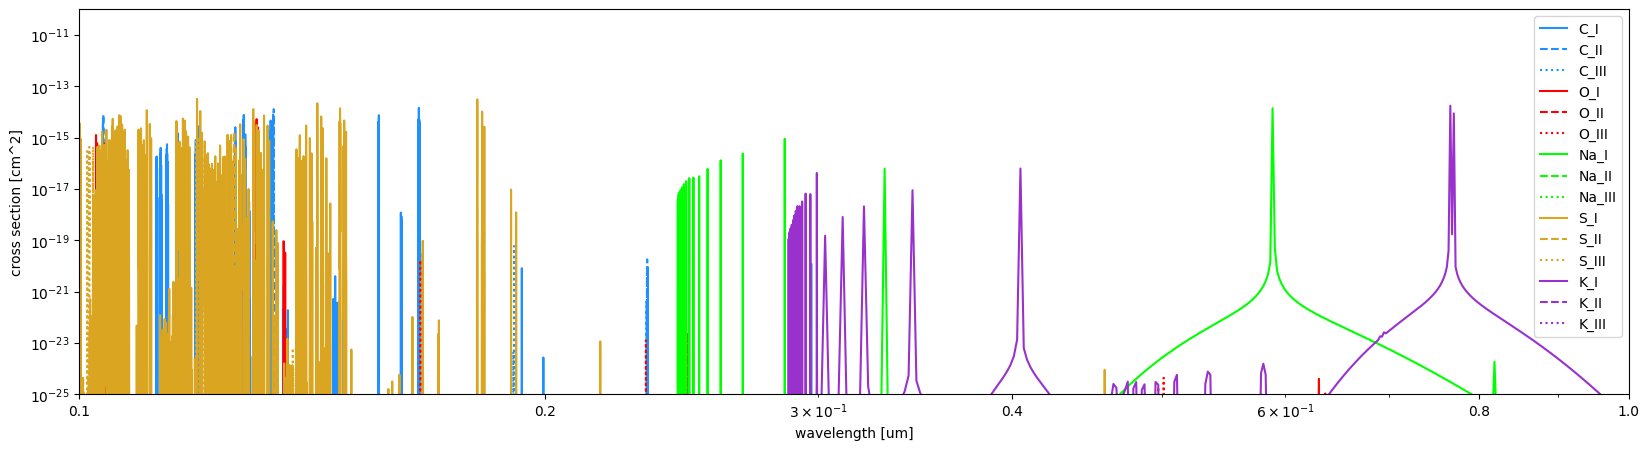

In [2]:
### LOADING AND PLOTTING ###
filename = 'cross-sections-I-II-III.npy'
absorption_dict = np.load(filename,allow_pickle=True).item()

filename = 'cross-sections-I-II-III-bin.npy'
bin_cross_dict = np.load(filename,allow_pickle=True).item()

filename = 'cross-sections-I-II-III-full.npy'
full_cross_dict = np.load(filename,allow_pickle=True).item()

atoms = ('C','O','Na','S','K')
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')

plt.figure(figsize=(10,5))
for atom, color in zip(atoms,colors):
    #for ls, state_str in zip(('-','--',':',),('_I','_II','_III',)):
    for markerstyle, state_str in zip(('o','s','*',),('_I','_II','_III',)):
        lam, sigma, hws, mass = absorption_dict[atom+state_str]
        plt.errorbar(lam,sigma,xerr=hws,marker=markerstyle,markersize=10,ls='none',label=atom+state_str,color=color)

plt.xlabel('wavelength [um]')
plt.ylabel('cross section [cm^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(0.1,1)
plt.xticks(ticks=[0.1,0.2,0.4,0.8,1.0],
           labels=['{:.1F}'.format(i) for i in [0.1,0.2,0.4,0.8,1.0]])
plt.ylim((1e-25,1e-12))
plt.show()
plt.close()

plt.figure(figsize=(20,5))
for atom, color in zip(atoms,colors):
    for ls, state_str in zip(('-','--',':',),('_I','_II','_III',)):
        lam, sigma, mass = full_cross_dict[atom+state_str]
        plt.plot(lam,sigma,label=atom+state_str,ls=ls,color=color)

plt.xlabel('wavelength [um]')
plt.ylabel('cross section [cm^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(0.1,1)
plt.xticks(ticks=[0.1,0.2,0.4,0.8,1.0],
           labels=['{:.1F}'.format(i) for i in [0.1,0.2,0.4,0.8,1.0]])
plt.ylim((1e-25,1e-10))
plt.show()
plt.close()

plt.figure(figsize=(20,5))
for atom, color in zip(atoms,colors):
    for ls, state_str in zip(('-','--',':',),('_I','_II','_III',)):
        lam, sigma, mass = bin_cross_dict[atom+state_str]
        plt.plot(lam,sigma,label=atom+state_str,ls=ls,color=color)

plt.xlabel('wavelength [um]')
plt.ylabel('cross section [cm^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(0.1,1)
plt.xticks(ticks=[0.1,0.2,0.4,0.8,1.0],
           labels=['{:.1F}'.format(i) for i in [0.1,0.2,0.4,0.8,1.0]])
plt.ylim((1e-25,1e-10))
plt.show()
plt.close()

In [3]:
### CONSTANTS OF LENGTH ###
au      = 1.496e13  # cm
rads    = 6.957e10  # cm
rade    = 6.371e8   # cm

### CONSTANTS OF TIME ###
day     = 86400     # s
year    = 3.1536e7  # s

### CONSTANTS OF MASS ###
masss   = 1.989e33  # g
masse   = 5.9722e27 # g
amu     = 1.66e-24  # g

### OTHER CONSTANTS ###
G       = 6.6743e-8 # dyne cm^2 g^-2
kB      = 1.381e-16 # erg K^-1
pi      = np.pi     # no dims
mu0     = 1/(8*pi)  # g cm^-1 s^-2, cgs version of (1 Gauss)^2 / 2 mu0

### PLANETS WE ARE INTERESTED IN ###
tois = ['GJ 1132 b', 'GJ 367 b', 'GJ 486 b',
        'GJ 9827 b', 'GJ 9827 c', 'HD 23472 d',
        'HD 23472 e', 'HD 23472 f', 'HD 260655 b',
        'HD 63433 d', 'K2-36 b', 'Kepler-102 b',
        'Kepler-102 c', 'Kepler-102 d', 'L 168-9 b',
        'L 98-59 b', 'LHS 1678 b', 'TOI-238 b']

best = ['GJ 367 b',]

### PLOTTING STUFF ###
fontsize_axis = 16
fontsize_tick = 14

In [4]:
### EQUATIONS ###
def torus_volume(a, H, n=3):
    # Torus volume assuming the torus spans n scale heights and starts at r_inner = a.
    r = n*H/2
    R = a + r
    return (pi*(r**2))*(2*pi*R)

def torus_mass(n, m, V):
    # Torus mass based on isotropic mass distribution.
    return n*m*V

def volc(tau, M):
    # Torus supply rate based on the torus mass and how long it takes to escape from the torus.
    return M/tau

def number_dens(fs, H, sig, n=3):
    # Number density which produces an absorption signature of fs in a torus of n scale heights for absorbers of size sig.
    ds = n*H
    return fs/(sig*ds)

def scale_height(T, m, Omega):
    # Plasma diffusion scale height, used here to approximate the scale radius.
    return np.sqrt((2/3)*kB*T/(m*(Omega**2)))

def get_teq(aoR,Teff):
    # 0-albedo equilibrium temperature, needed for scale height.
    return Teff*((1/4)**(1/4))/(aoR**0.5)

def lifetime(aoR, RA, Omega):
    # Minimum torus reservoir lifespan based on uninhibited magnetospheric convection.
    return np.sqrt(2/3)*((RA/aoR)**2)*(1/Omega)

def vesc(m, r):
    # Escape velocity.
    return np.sqrt(2*G*m/r)

def eta_star(b, r, wind, vinf):
    # Eta*, the wind magnetic confinement parameter, which is dimensionless.
    return ((b**2)*mu0)*(r**2)/(wind*vinf)

def _residuals(ra, eta):
    # Residual function, see below.
    lhs = ra**4 - ra**3
    return (lhs-eta)**2

def get_alfven(eta):
    # Owocki 2009 Alfven radius solver.
    results = minimize(_residuals,np.array([20,]),args=(eta,))
    return results.x[0]

def empirical_mass(r):
    # The Chen & Kipping 2017 / Louie et al. 2018 mass-radius relations. Useful if you don't have a planet mass measurement on hand.
    emp_m = 0.9718*(r**3.58)
    if r > 1.23:
        emp_m = 1.436*(r**1.70)
    return emp_m

def get_tidal_power(p,rp,e):
    # Seligman et al. 2024 tidal power relation, scaled by the unknown quality factor.
    return (3.4*1e27)*(p**-5)*(rp**5)*((e/0.01)**2)

Some assumptions:
I typically take the stellar B to be 500 G. This is my attempt to compromise between the mild B fields of G stars (~100 G) and the extreme B fields of M stars (1 kG or more). For M stars in our sample, consider B to be possibly underestimated. For G stars, consider B to be possibly overestimated. As most of the stars in our sample are K and M stars, erring on the side of slightly-higher-than-G-star seems reasonable.
I also usually take the wind loss rate to be 10^-14 solar masses per year based on our own solar wind. This is usually an underestimate for earlier types of stars, but we won't encounter too many F- or A-orbiting targets here anyhow.

Rationale for how to pick the planets off of Exoplanet Archive (performed Nov 2024 so numbers may change when you try this):
To do these calculations, you have to have a stellar rotation rate, otherwise you will not be able to get a lifetime. So you need to enable that column, and set it to >0 so that we only get stars for which this is measured. This cuts the available targets down to 890. This is a big cut because not many people measure this value, since you normally don't need to know about it.

You are also going to need a known stellar mass, radius, and effective temperature, for getting the eta* parameter that helps you solve for the Alfven radius. Set all of those >0. Target N should fall to 795. These measurements are common so this cut is small.

You need to know the planet's semimajor axis in order to determine if it is inside the Alfven radius. So set orbit semimajor axis >0. The targets are now down to 617.

Since we are interested in outgassing from volcanically-active terrestrial planets, it won't benefit us to include large radii planets. Set planetary radius to bounds [0.0,1.60]. The number of targets is now 87. This is another big cut, because small planets are hard to find.

You could, at this point, make a few extra cuts if you wanted:

a. You could cut on mass to ensure it is terrestrial (e.g. < 4.0ME), but I use the empirical relation when there's no known mass.

b. You could cut on equilibrium temperature to ensure it's not a ball of lava (e.g. T < 1500 K), but I think it's worth looking at ultra-hot rocks.

c. You could cut on eccentricity > 0 to ensure tidal heating, but I think it's worth acknowledging non-eccentric targets that could be intensely volcanic anyhow, i.e. super young planets.

d. You could cut on number of planets in the system to ensure multiplanetary systems only, but it's worth looking at single targets anyhow because they probably aren't really alone.

e. You could also cut on whether or not this is the default parameter set. If you do that, it drops us to 41 available targets. I instead prefer to take all options, and then pick and choose between the planets that have duplicate entries.

At this stage, I take my targets. The columns I need to have are:

N planets in system

Whether it has been detected in RVs, which tells us how good the ecc measurement is

Planet parameter reference, again useful for knowing whether the ecc measurement is good

Planet name

Planet orbit semimajor axis

Planet orbit period, needed if you are going to compute tidal heating rates

Planet radius

Planet mass

Planet eccentricity, which may be unknown

Planet equilibrium temperature, which may be unknown

Stellar radius

Stellar mass

Stellar effective temperature

Stellar rotation period

System V magnitude

I attached my table to the GitHub so you can quickly recreate this, but also, you should play around with it, see what else is out there. Some notes on special treatments I made:
1. LHS 1815 b is in my table as the Gan+ 2020 entry, but I used the better mass constraint from Luque+ 2022.
2. KOI 4777.01 has a weird mass measurement of <99 Earth masses on the archive, but their paper says it's meant to be <0.34 Earth masses. I think someone entered something wrong, so I replaced the data entry there with the correct upper bound.
3. Kepler-107 c makes it through all the checks but the mass measurements are really weird, like 2x iron density weird. I toss this target for safety's sake.
4. LHS 1678 b and c have two retrieved entries, Silverstein+ 2022 and 2024. I took the 2024 one since its ecc measurements had bounds, not just upper limits.
4. GJ 367 b retrieved two entries, Goffo+ 2023 and Lam+ 2021. Goffo+ 2023 is the default parameter set so I nabbed it.
5. GJ 486 b retrieved two entries, Trifonov+ 2021 and Caballero+ 2022. It did not collect the most recent set, Weiner Mansfield+ 2024, because that one didn't make a P_rot measurement for the star. I took most of the info from Weiner Mansfield+ 2024, subbing P_rot with Caballero+ 2022 data.
6. The GJ 9827 system had a plethora of measurements come up. Only Bonomo+ 2023 tried to estimate the eccentricity, so I took that one. It's only an upper bound though, so it's not particularly robust. But it is a multiplanetary system so that can be good for long-lived eccentricity.
7. K2-141 b had a Bonomo+ 2023 entry as well so I took that.
8. K2-36 b was the same as above.
9. The L 98-59 system was supplied entirely by Demangeon+ 2024.
10. LHS 1140 c retrieved Ment+ 2019 and Cadieux+ 2024. The latter was taken as it is the default parameter set.
11. For GJ 1132 b, I use the info from Xue+ 2024, except the stellar rotation which I get from Bonfils+ 2018.
12. For HD 93963 A b, I use the info from Polanski+ 2024, except the stellar rotation which I get from Serrano+ 2022.
13. For HIP 29442 b and c, I use the info from Egger+ 2024, except the stellar rotation which I get from Damasso+ 2023.
14. For K2-233 b and c, I use the info from Lillo-Box+ 2020, except the stellar rotation which I get from David+ 2018. Since they are both oddly massive by these studies, I let them go.
15. For the TOI-700 system, I use Gilbert+ 2023 for most parameters, and Gilbert+ 2020 for the stellar rotation.
16. For TRAPPIST-1, I use Agol+ 2021 for most parameters, Gillon+ 2016 for the stellar rotation, and Grimm+ 2018 for the eccentricity.

In [5]:
# Read in our table.
data = pd.read_excel('plasma_planets3.xlsx',header=96)
print(list(data.keys())) # check that we got the header row right, this should say stuff like 'pl_name'

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_rotp', 'st_rotperr1', 'st_rotperr2', 'st_rotplim', 'sy_refname

Now let's establish the workflow. We have x number of planets that we need to make some calculations for, as follows:
1. Compute vinf
2. Compute eta*
3. Solve for RA
4. Determine tau
5. Determine tidal heating, where applicable

Then, for each absorbing species and desired absorption strength:
1. Determine number density needed to produce absorption
2. Determine torus steady state mass with that number density
3. Determine torus mass input to sustain that steady state mass

In [6]:
### VALUES THAT I AM ASSUMING ###
stellar_B = 500 # gauss, built into the mu0 value
wind_mass = (1e-14)*masss/year # g/s

In [7]:
### BIG WRAPPER FUNCTIONS ###
def process_planet(pdata,k):
    # 0. Some useful numbers
    aor = (au/rads)*(pdata['pl_orbsmax'][k]/pdata['st_rad'][k])
    if pdata['pl_name'][k] == 'Io':
        aor = 6 # units for Io are a bit funky: R* is supposed to be Jupiter radius
    omega = 2*pi/(day*pdata['st_rotp'][k])
    Teff=pdata['st_teff'][k]
    teq = get_teq(aoR=aor,Teff=Teff)
    if pdata['pl_name'][k] == 'Io':
        teq = 110 # Io is orbiting Jupiter which is orbiting the Sun which really sets Teq
    ecc_err = [pdata['pl_orbeccenerr1'][k],pdata['pl_orbeccenerr2'][k]]
    V = pdata['sy_vmag'][k]

    # 1. Compute vinf
    vinf = vesc(m=masss*pdata['st_mass'][k],
                r=rads*pdata['st_rad'][k])
    
    # 2. Compute eta*
    eta = eta_star(b=stellar_B,
                   r=rads*pdata['st_rad'][k],
                   wind=wind_mass,
                   vinf=vinf)
    
    # 3. Solve for RA
    alfven = get_alfven(eta=eta)
    if pdata['pl_name'][k] == 'Io':
        alfven = 20

    # 4. Determine torus lifetime
    tau = lifetime(aoR=aor,
                   RA=alfven,
                   Omega=omega)
    if pdata['pl_name'][k] == 'Io':
        tau = 50*day # 50 days is chosen since 20 to 80 days is the range of tau measured for Io and (20+80)/2 = 50
    
    # 5. Determine tidal heating, where applicable
    tides = 0
    if all(not np.isnan(x) for x in (pdata['pl_orbper'][k],pdata['pl_rade'][k],pdata['pl_orbeccen'][k])):
        tides = get_tidal_power(pdata['pl_orbper'][k],pdata['pl_rade'][k],pdata['pl_orbeccen'][k])
        if np.isnan(tides):
            tides = 0
        if not np.isfinite(tides):
            tides = 0
    if pdata['pl_name'][k] == 'Io':
        tides = 1.6e21 # from Seligman+ 2024
    
    # Trim any planets that have weird masses
    pmass = pdata['pl_bmasse'][k]
    if (np.isnan(pmass) or pmass == 0):
        pmass = empirical_mass(r=pdata['pl_rade'][k])
    if pmass > 8.0:
        print(pdata['pl_name'][k],'had an abnormally huge mass ({} Earth masses with radius {} Earth radii) and was discarded.'.format(pmass,pdata['pl_rade'][k]))
        return False
    else:
        return alfven, tau, tides, aor, teq, V, pdata['pl_rade'][k], pmass, Teff, ecc_err

def process_abs(pdata,k,tau,mol_mass,mol_sigma,
                fs=100e-6,n=3):
    # 0. Some useful numbers
    aor = (au/rads)*(pdata['pl_orbsmax'][k]/pdata['st_rad'][k])
    if pdata['pl_name'][k] == 'Io':
        aor = 6
    omega = 2*pi/(day*pdata['st_rotp'][k])
    Teff=pdata['st_teff'][k]
    teq = get_teq(aoR=aor,Teff=Teff)

    # 1. Determine number density needed to produce absorption
    h = scale_height(T=teq,m=amu*mol_mass,Omega=omega)
    n_dens = number_dens(fs,h,mol_sigma,n)

    # 2. Determine torus steady state mass with that number density
    V = torus_volume(au*pdata['pl_orbsmax'][k],h,n)
    tMass = torus_mass(n_dens,amu*mol_mass,V)

    # 3. Determine torus mass input to sustain that steady state mass
    mdot = volc(tau,tMass)

    # 4. Get column density, out of academic interest
    ncol = n*h*n_dens
    
    return h, n_dens, tMass, mdot, ncol

In [8]:
### COMPILING THESE NUMBERS TO MAKE PLOTS WITH ###
alfvens, taus, tideses, aors, teqs, Vs, rps, mps, names, ecc_errs = [], [], [], [], [], [], [], [], [], []
a, P, ecc, mstar, rstar, pstar, Tstar, sys_dist = [], [], [], [], [], [], [], []
for k in range(len(data)):
    try:
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        alfvens.append(alfven)
        taus.append(tau)
        tideses.append(tides)
        aors.append(aor)
        teqs.append(teq)
        Vs.append(V)
        rps.append(rp)
        mps.append(mp)
        ecc_errs.append(ecc_err)
        names.append(data['pl_name'][k])

        a.append(data['pl_orbsmax'][k])
        P.append(data['pl_orbper'][k])
        ecc.append(data['pl_orbeccen'][k])
        mstar.append(data['st_mass'][k])
        rstar.append(data['st_rad'][k])
        pstar.append(data['st_rotp'][k])
        Tstar.append(Teff)
        sys_dist.append(data['sy_dist'][k])
    except TypeError:
        pass

K2-233 b had an abnormally huge mass (11.26 Earth masses with radius 1.343 Earth radii) and was discarded.
K2-233 c had an abnormally huge mass (12.81 Earth masses with radius 1.281 Earth radii) and was discarded.
Kepler-107 c had an abnormally huge mass (9.39 Earth masses with radius 1.597 Earth radii) and was discarded.


In [18]:
### PLOTTING FUNCTIONS ###
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('RdYlBu')
spectral_cmap = truncate_colormap(cmap, 0.0, 0.55)

def plot_alfven_aor(names,alfvens,aors,rps,Tstar):
    # Rescale size
    F = 1000
    sizes = F*np.log10(np.square(np.array(rps))+1)
    re_size = F*np.log10(np.square(np.array(1))+1)
    
    # Put the data on
    fig, ax = plt.subplots(figsize=(10,8))

    im = ax.scatter(aors,alfvens,c=Tstar,cmap=spectral_cmap,edgecolors='k',s=sizes,vmin=2500,vmax=6000)
    
    for name, alfven, aor, size in zip(names,alfvens,aors,sizes):
        if (all(i <= 40 for i in (alfven,aor))):# and name=='Io'):
            if name in tois:
                ax.scatter(aor,alfven,s=size,color='None',edgecolor='blue',lw=3)
            elif name == 'Io':
                ax.scatter(aor,alfven,s=size,color='black',edgecolor='black')
                ax.text(aor,alfven-1,s=name,
                        ha='center',va='center',fontsize=fontsize_tick,
                        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                              foreground='white')])
            if name in best:
                ax.scatter(aor,alfven,s=size,color='blue',marker='x',lw=1)
    
    im2 = ax.scatter(-1000,-1000,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(-1000,-1000,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='upper right',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)

    ax.plot([0,50],[0,50],color='red',ls='--')
    ax.text(6,7,s=r'INSIDE R$_A$',rotation=45,
            color='red',weight='bold',fontsize=fontsize_tick)
    ax.arrow(7.5,10,dx=-3,dy=3,color='red',width=0.25)
    
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='lower right',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    plt.rc('grid',color='grey',alpha=0.5,ls=':')
    plt.grid()
    plt.xlim(0,40)
    plt.ylim(5,45)
    plt.xticks(ticks=[0,5,10,15,20,25,30,35,40])
    plt.yticks(ticks=[5,10,15,20,25,30,35,40,45])
    ax.set_xlabel('Semimajor Axis [Stellar Radii]',fontsize=fontsize_axis)
    ax.set_ylabel('Alfven Radius [Stellar Radii]',fontsize=fontsize_axis)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
    cb = plt.colorbar(mappable=im,)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)

    plt.savefig('alfven_radii.png',dpi=300,bbox_inches='tight')
    plt.close()

def plot_timescale(taus,alfvens,aors,names,rps,Tstar):
    # Rescale size
    F = 1000
    re_size = F*np.log10(np.square(np.array(1))+1)
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    # Put the data on
    fig, ax = plt.subplots(figsize=(10,8))
    lols = np.array([i/j for i,j in zip(aors,alfvens)])
    staus = np.array([t/day for t in taus])
    Tstar = np.array(Tstar)
    im = ax.scatter(lols[lols <= 1],staus[lols <= 1],c=Tstar[lols <= 1],cmap=spectral_cmap,edgecolors='k',s=sizes[lols <= 1],vmin=2500,vmax=6000)
    for name, lol, tau, size in zip(names,lols,staus,sizes):
        if (lol <= 1): # and name=='Io'):
            if name in tois:
                ax.scatter(lol,tau,s=size,color='None',edgecolor='blue',lw=3)
            elif name == 'Io':
                ax.scatter(lol,tau,s=size,color='black',edgecolor='black')
                ax.text(lol,tau-10,s=name,
                        ha='center',va='center',fontsize=fontsize_tick,
                        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                              foreground='white')])
            if name in best:
                ax.scatter(lol,tau,s=size,color='blue',marker='x',lw=1)
    
    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower left',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)

    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='upper right',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    plt.rc('grid',color='grey',alpha=0.5,ls=':')
    plt.grid()
    plt.xlim(0,1)
    plt.yscale('log')
    plt.ylim(0.5,500)
    plt.xticks(ticks=[0,0.25,0.5,0.75,1.00])
    plt.yticks(ticks=[1,10,100,500],
               labels=['1.0','10.0','100.0','500.0'])
    ax.set_xlabel('Semimajor Axis [Alfven Radii]',fontsize=fontsize_axis)
    ax.set_ylabel('Transport Timescale [Days]',fontsize=fontsize_axis)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)

    plt.savefig('alfven_tau.png',dpi=300,bbox_inches='tight')
    plt.close()

def plot_tau_tides(names,taus,masses,tides,alfvens,aors,rps,teqs,vs):
    for v,zl,C,vmin,vmax in zip((teqs,vs),('Equilibrium Temperature [K]',
                                     'Magnitude [V]'),
                                     ('Reds','Greens'),
                                     (500,5),
                                     (2000,13)):
        # Rescale size
        F = 1000
        re_size = F*np.log10(np.square(np.array(1))+1)
        # Put the data on
        fig, ax = plt.subplots(figsize=(10,5))
        lols = np.array([i/j for i,j in zip(aors,alfvens)])
        sizes = np.array(F*np.log10(np.square(np.array(rps))+1))[lols <= 1]
        stides = np.array([t/(masse*m) for t,m in zip(tides,masses)])[lols <= 1]
        staus = np.array([t/day for t in taus])[lols <= 1]
        v = np.array(v)[lols <= 1]
        snames=np.array(names)[lols <= 1]

        # Make the Io point invisible
        io_index = np.argwhere(snames=='Io')[0]
        original_io_size = sizes[io_index]
        sizes[io_index] = 0

        im = ax.scatter(stides[stides > 0],staus[stides > 0],c=v[stides > 0],cmap=C,edgecolors='blue',s=sizes[stides > 0],
                        vmin=vmin,vmax=vmax,lw=3)
        for name, tide, tau, size in zip(snames[stides > 0],stides[stides > 0],staus[stides > 0],sizes[stides > 0]):
            if name == 'Io':
                ax.scatter(tide,tau,s=original_io_size,c=5,cmap=C,edgecolor='black')
                ax.text(tide,tau-15,s=name,
                        ha='center',va='center',fontsize=fontsize_tick,
                        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                              foreground='white')])
            if name in best:
                ax.scatter(tide,tau,s=size,color='None',edgecolor='blue',lw=3)
                ax.scatter(tide,tau,s=size,color='blue',marker='x',lw=1)

        im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
        im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
        lgnd2 = ax.legend(handles=(im2,im3),loc='upper left',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)
                
        # Legend for plot sizes
        labels = ['0.5RE','1.0RE','1.5RE']
        hands = []
        for l in labels:
            hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
            hands.append(hand)
        lgnd = ax.legend(handles=hands,loc='lower left',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
        lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
        lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
        lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

        ax.add_artist(lgnd2)
        ax.add_artist(lgnd)
        
        # Make it pretty
        plt.rc('grid',color='grey',alpha=0.5,ls=':')
        plt.grid()
        #plt.xlim(0,1)
        plt.xlim(1e-5,1e4)
        plt.xticks([1e-5,1e-3,1e-1,1e1,1e3])
        plt.xscale('log')
        plt.yscale('log')
        plt.ylim(0.5,100)
        #plt.xticks(ticks=[0,0.25,0.5,0.75,1.00])
        y_ticks = [1,5,10,50,100,500]
        plt.yticks(ticks=y_ticks,
                labels=['%.1f' % x for x in y_ticks])
        ax.set_xlabel(r'$\dot{E}_{\rm heat}$/Im(k$_2$)/Mass [erg/s/g]',fontsize=fontsize_axis)
        ax.set_ylabel('Transport Timescale [Days]',fontsize=fontsize_axis)
        cb = plt.colorbar(mappable=im)
        cb.set_label(zl, fontsize=fontsize_axis)
        cb.ax.tick_params(labelsize=fontsize_tick)
        ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)


        plt.savefig('alfven_tides_{}.png'.format(C),dpi=300,bbox_inches='tight')
        plt.close()

def generate_table_lifetimes(names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,taus,ecc_errs,dists):
    # Sort everything by torus lifetime.
    b = [k for k in zip(names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,ecc_errs,dists,taus) if not np.isnan(k[-1])]
    b = list(reversed(sorted(b,key=lambda x:x[-1])))
    names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,ecc_errs,dists,taus = [[x[i] for x in b] for i in range(len(b[0]))]

    # Convert alfven radius to AU.
    ra = [x*rs*rads/au for x,rs in zip(ra,rstar)]
    # Convert timescale to days.
    taus = [x/day for x in taus]
    # Get H for 32 amu.
    H = []
    for i in range(len(names)):
        H.append(scale_height(teq[i],32*amu,2*pi/(pstar[i]*day)))

    # Fill out table.tex file.
    with open('table.tex',mode='w') as f:
        for i in range(len(names)):
            if names[i] == "Io":
                continue
            if (tides[i] > 0 and a[i]/ra[i] <= 1):
                if np.isnan(ecc_errs[i][0]):
                    f.write('{} & {:.3F} & {:.3F} & {:.0F} & {:.3F} & $<${:.3F} & {:.3F} & {:.0F} & {:.2F} & {:.2F} & {:.2F} & {:.3F} & {:.0F} & {:.2E} & {:.0F} & \\\\ \n'.format(names[i],
                                            a[i],
                                            ra[i],
                                            H[i]/(100*1000), # turn cm into km
                                            P[i],
                                            ecc[i],
                                            rp[i],
                                            teq[i],
                                            mstar[i],
                                            rstar[i],
                                            pstar[i],
                                            vmag[i],
                                            dists[i],
                                            tides[i],
                                            taus[i],))
                else:
                    f.write('{} & {:.3F} & {:.3F} & {:.0F} & {:.3F} & {:.3F}$^{{{:.3F}}}_{{{:.3f}}}$ & {:.3F} & {:.0F} & {:.2F} & {:.2F} & {:.2F} & {:.3F} & {:.0F} & {:.2E} & {:.0F} & \\\\ \n'.format(names[i],
                                            a[i],
                                            ra[i],
                                            H[i]/(100*1000), # turn cm into km
                                            P[i],
                                            ecc[i],
                                            ecc_errs[i][0],
                                            ecc_errs[i][1],
                                            rp[i],
                                            teq[i],
                                            mstar[i],
                                            rstar[i],
                                            pstar[i],
                                            vmag[i],
                                            dists[i],
                                            tides[i],
                                            taus[i],))
                
def generate_table_outgassing(names,mdots,taus):
    # Sort everything by torus lifetime.
    b = [k for k in zip(names,mdots,taus)]
    b = list(reversed(sorted(b,key=lambda x:x[-1])))
    names,mdots,taus = [[x[i] for x in b] for i in range(len(b[0]))]
    
    # Find total outgassing rate of atoms and molecules in ton/s.
    total_atoms = []
    for i in range(len(names)):
        mdot = [m for m in mdots[i] if isinstance(m,float)]
        total_atoms.append(np.sum(mdot)/1e6)
    #total_atoms = [np.sum(m)/1e6 for m in mdots]

    with open('table2.tex',mode='w') as f:
        for i in range(len(names)):
            if names[i] == "Io":
                continue
            mdot_planet = ['{:.0F}'.format(k/1e6) if isinstance(k,float) else k for k in mdots[i]]
            total_atoms[i] = '{:.0F}'.format(total_atoms[i])
            print(names[i],mdot_planet,total_atoms[i])
            #f.write('{} & {:.2E} & {:.2E} & {:.2E} & {:.2E} & {:.2E} & {:.2E} \\\\ \n'.format(names[i],
            #f.write('{} & {:.0F} & {:.0F} & {:.0F} & {:.0F} & {:.0F} & {:.0F} \\\\ \n'.format(names[i],
            #f.write('{} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\\\ \n'.format(names[i],
            f.write('{} & {} & {} & {} & {} & {} & {} \\\\ \n'.format(names[i],
                                                                                                       mdot_planet[0],
                                                                                                       mdot_planet[1],
                                                                                                       mdot_planet[2],
                                                                                                       mdot_planet[3],
                                                                                                       mdot_planet[4],
                                                                                                       total_atoms[i],))
                                                                                                       #mdot_planet[5],
                                                                                                       #mdot_planet[6],
                                                                                                       #mdot_planet[7],
                                                                                                       #total_atoms[i],))

In [19]:
# Generate all plots and make the table.
plt.rcParams['mathtext.default'] = 'regular'
plot_alfven_aor(names,alfvens,aors,rps,Tstar)
plot_timescale(taus,alfvens,aors,names,rps,Tstar)
plot_tau_tides(names,taus,mps,tideses,alfvens,aors,rps,teqs,Vs)
generate_table_lifetimes(names,a,alfvens,P,ecc,rps,teqs,mstar,rstar,pstar,Vs,tideses,taus,ecc_errs,sys_dist)

In [20]:
# Use the absorption dict, which contains [central lambda,cross-section,halfwidth,mass], to get n_dens needed for 100 ppm absorption
for key in (list(absorption_dict.keys())):
    print(key,absorption_dict[key][1])
hs, n_denses, tMasses, mdots, ncols = [],[],[],[], []
new_names = []
new_taus = []
for k in range(len(data)):
    try:
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        if alfven < aor:
            print(1/0)
        if tides == 0:
            print(1/0)
        hk, nk, tk, mk, nck = [],[],[],[],[]
        for spec in list(absorption_dict.keys()):
            if spec in ("Na_II","Na_III","K_II","K_III","C_III","O_II","O_III"):
                continue # these ones are not worth looking at, too weak
            if "_II" in spec:
                continue # just wholesale skip ions for now
            central_lams,mol_sigma,halfwidths,mol_mass = absorption_dict[spec]
            
            F = 0.10 # 10% absorption
            
            h_i, n_dens_i, tMass_i, mdot_i, ncol_i = process_abs(data,k,tau,mol_mass,mol_sigma,
                                                fs=F,n=3)
            
            if mdot_i/1e6 > 10000:
                mdot_i = 'N/A'
            hk.append(h_i)
            nk.append(n_dens_i)
            tk.append(tMass_i)
            mk.append(mdot_i)
            nck.append(ncol_i)
        if all(k=='N/A' for k in mk):
               # if none of the rates are reasonable, leave it
               continue
        hs.append(hk)
        n_denses.append(nk)
        tMasses.append(tk)
        mdots.append(mk)
        ncols.append(nck)
        new_names.append(data['pl_name'][k])
        new_taus.append(tau)
    except:
        pass
generate_table_outgassing(new_names,mdots,new_taus)
# looking at C_I-II, O_I, Na_I, S_I-II-III, and K_I

C_I 9.703085799915102e-15
C_II 7.334622730593652e-15
C_III 3.0261330742049935e-20
O_I 2.635452597304131e-15
O_II 1.2945942379771486e-23
O_III 1.638188541499227e-20
Na_I 1.4068521100725687e-14
Na_II 2.6251429423534367e-180
Na_III 2.0113203744043994e-244
S_I 1.561460551649943e-14
S_II 8.467387289128128e-16
S_III 5.252943541775744e-16
K_I 1.7594447242051677e-14
K_II 1.1003696377017512e-115
K_III 3.302052527192668e-136
K2-233 b had an abnormally huge mass (11.26 Earth masses with radius 1.343 Earth radii) and was discarded.
K2-233 c had an abnormally huge mass (12.81 Earth masses with radius 1.281 Earth radii) and was discarded.
Kepler-107 c had an abnormally huge mass (9.39 Earth masses with radius 1.597 Earth radii) and was discarded.
GJ 367 b ['1', '5', '1', '1', '1'] 9
TOI-238 b ['5', '22', '5', '5', '5'] 42
GJ 9827 b ['6', '25', '5', '6', '6'] 48
LHS 1678 b ['11', '45', '10', '10', '9'] 85
L 168-9 b ['7', '31', '7', '7', '7'] 59
K2-36 b ['6', '27', '6', '6', '6'] 51
HD 23472 d ['35', 

Lastly, we need a plot of the stellar spectrum of GJ 367 with and without torus contamination.

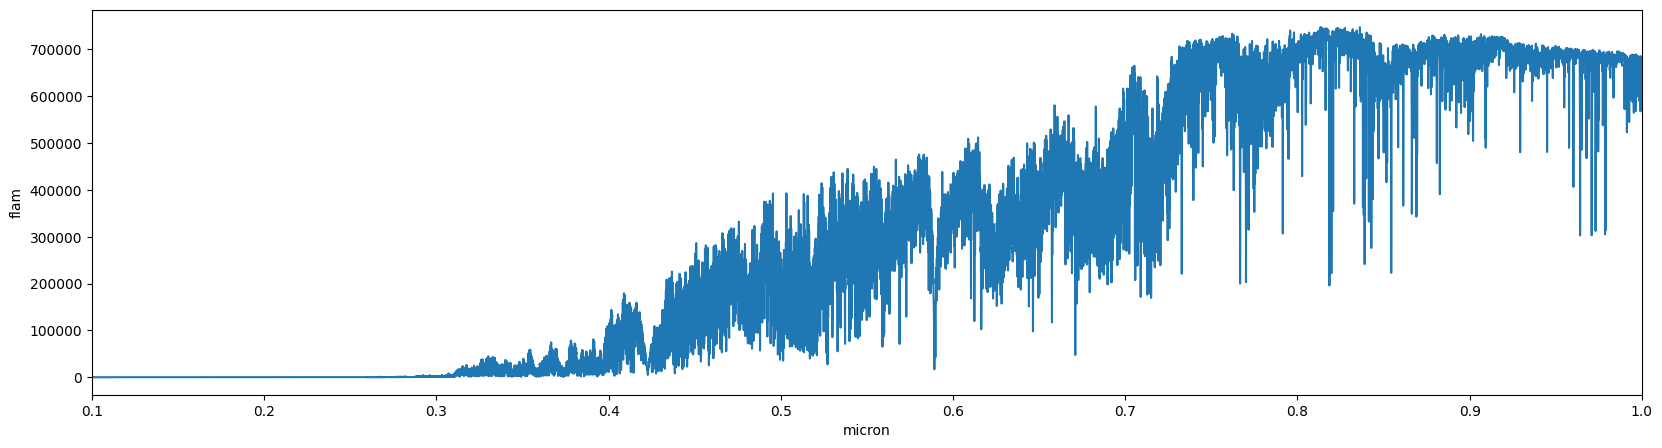

Fixing cross sections...:  40%|████      | 6/15 [00:08<00:12,  1.42s/it]


KeyError: 'Na_I'

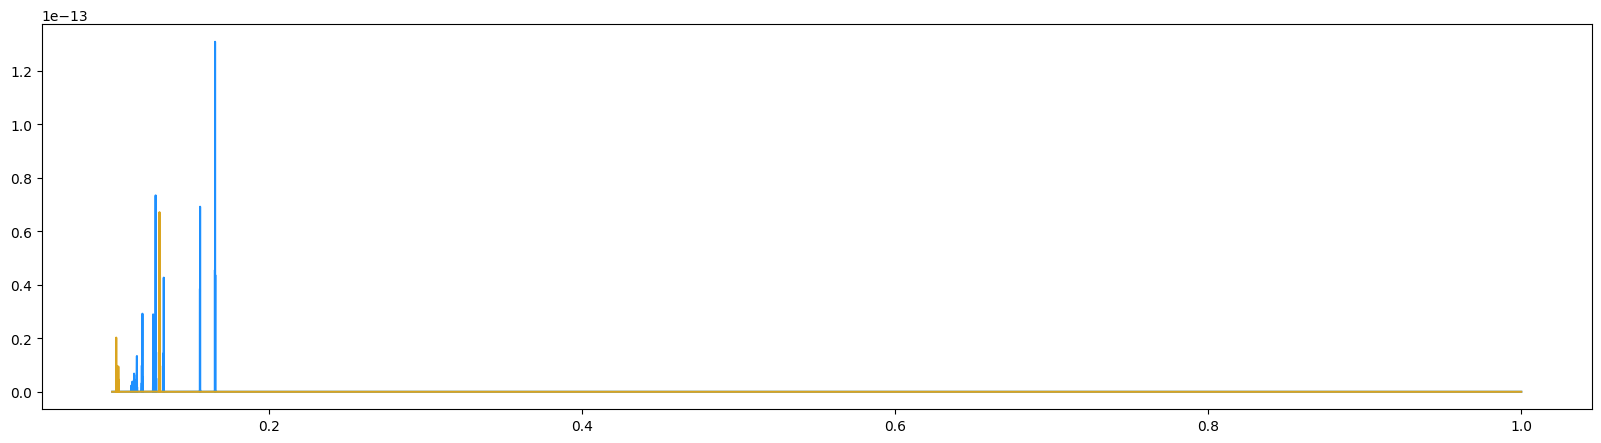

In [22]:
#M, Teff, logg = (0, 5780, 4.43)
M, Teff, logg = (-0.01, 3522, 4.77) # Goffo+ 2023 stellar parameters

# Use pysynphot to get the phoenix model for GJ 367 A
sp = S.Icat('phoenix', Teff, M, logg)
# angstrom to micron
sp.convert('micron')
plt.figure(figsize=(20,5))
plt.plot(sp.wave,sp.flux)
plt.xlabel(sp.waveunits)
plt.ylabel(sp.fluxunits)
plt.xlim(0.1,1.00)
plt.show()
plt.close()

# Truncate flux to our range of interest and normalize it
flux = sp.flux
wave = sp.wave
ok = (wave>0.1) & (wave<10)
fluxGJ = flux[ok]/np.max(flux[ok])
waveGJ = wave[ok]

# For each species, need to get its scale height
# And we need to interpolate the PHOENIX model onto this grid
from scipy.interpolate import interp1d
interpolated = False
full_cross_dict_H = {}
plt.figure(figsize=(20,5))
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')
colors_dict = {}
for spec, color in zip([k for k in list(full_cross_dict.keys()) if "_II" not in k],colors):

    colors_dict[spec] = color
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    if "_II" in spec:
        continue
    wave, sigma, mass = full_cross_dict[spec]
    wave = np.array([i for i in list(reversed(wave))])
    sigma = np.array([i for i in list(reversed(sigma))])

    h = scale_height(T=Teff,m=mass*amu,Omega=2*pi/(day*30))

    full_cross_dict_H[spec] = [wave,sigma,h]

    plt.plot(wave,sigma,label=spec,color=colors_dict[spec])
    
    if not interpolated:
        interpolater = interp1d(waveGJ,fluxGJ,fill_value=0,bounds_error=False)
        new_flux = interpolater(wave)
        waveGJ = wave
        fluxGJ = new_flux
        interpolated = True
plt.legend()
plt.xlabel('wavelength [um]')
plt.ylabel('cross-section [cm2]')
plt.yscale('log')
plt.xlim(0.10, 1.00)
plt.ylim(1e-25,1e-10)
plt.show()
plt.close()

# Recall that f = Ncol ds = n sigma 3 H
# We have h for each species and sigma for each wavelength for each species
# n was determined in the cell above, let's go get it
for n_dens, name in zip(n_denses, new_names):
    if name == 'GJ 367 b':
        number_densities = n_dens
ndens_dict = {}
for i, key in enumerate(list(absorption_dict.keys())):
    ndens_dict[key] = number_densities[i]
col_dens_dict = {}
col_dens_dict['O_I'] = 1e14
col_dens_dict['S_I'] = 6*1e13
col_dens_dict['C_I'] = 4*1e14
col_dens_dict['K_I'] = 1e11
col_dens_dict['Na_I'] = 1e12

# Now that we have gotten n for each species, we can get f.
modified_flux = np.copy(fluxGJ)
mod_fluxes = []
absorptions = {}
plt.figure(figsize=(10,5))
for spec in tqdm(list(absorption_dict.keys()),
                desc='Computing absorption...'):
    if "_II" in spec:
        continue
    wave, sigma, h = full_cross_dict_H[spec]
    ok = (wave>0.1) & (wave<1.0)
    n_dens = ndens_dict[spec]
    f = 1 - (n_dens * sigma * 3 * h)
    print('column density of {}: {:.2E} cm-2'.format(spec,n_dens*3*h))
    '''
    col_dens = 1e10
    f = 1 - (sigma*col_dens)#(n_dens * sigma * 3 * h)
    f[f<0] = 0
    f = np.array(f)
    while np.min(f[ok]) > 0.1: # while min abs is not yet 10%
        col_dens *= 1.05
        f = 1 - (sigma*col_dens)
        f[f<0] = 0
        f = np.array(f)
    print('column density of {}: {:.2E} cm-2'.format(spec,col_dens))
    mindex = np.argmin(f)
    print(min(f),wave[mindex])
    '''
    f[f<0] = 0
    f = np.array(f)
    mod_fluxes.append(modified_flux*f)
    absorptions[spec] = f

    plt.plot(wave,100*(1-f),label=spec,color=colors_dict[spec]) # plot the absorption of each species by wavelength
plt.legend()
plt.xlabel('wavelength [um]')
plt.ylabel('absorption [%]')
plt.xscale('log')
#plt.yscale('log')
plt.xlim(0.10, 1.00)
plt.ylim(0,20)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(20,5))
for mod_flux,spec in zip(mod_fluxes,list(full_cross_dict.keys())):
    ax.plot(waveGJ,mod_flux,ls='-',color=colors_dict[spec],label=str.replace(spec,"_II",""))
ax.plot(waveGJ,fluxGJ,ls='-',color='k',alpha=0.75)
ax.legend(loc='lower right',fontsize=fontsize_tick)

# Making the plot pretty
ax.set_yscale('log')
ax.set_ylim(1e-17,10)
yt = [1e-16,1e-12,1e-8,1e-4,1]
ax.set_yticks(yt)
ax.set_yticklabels(['{:.0E}'.format(f) for f in yt])

ax.set_xscale('log')
ax.set_xlim(0.1,1.0)
xt = [0.1,0.2,0.3,0.4,0.5,0.75,1.00]
ax.set_xticks(xt)
ax.set_xticklabels(['{:.2F}'.format(f) for f in xt])

from matplotlib.ticker import NullFormatter as nf
ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax.xaxis.set_minor_formatter(nf())
ax.set_xlabel(r'Wavelength [$\mu$m]',fontsize=fontsize_axis)
ax.set_ylabel('Flux [arbitrary units]',fontsize=fontsize_axis)
plt.rc('grid',color='grey',alpha=0.5,ls=':')
plt.grid()

plt.savefig('contam_spec.png',
            dpi=300,bbox_inches='tight')

plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(20,5))
# Try plotting the contamination strength?
for spec in tqdm(list(absorption_dict.keys()),
                desc='Plotting absorption...'):
    wave, sigma, h = full_cross_dict_H[spec]
    ok = (wave>0.1) & (wave<1.0)
    f = np.array([1-i for i in absorptions[spec]])
    # Get binned down version, where binning elements are 0.2 AA < 300 nm, and 2 nm > 300 nm.
    lam_step = 2e-5
    bin_w, bin_f = [],[]
    lam0 = 0.1
    while lam0 < 1.0:
        ok = (wave>lam0) & (wave<lam0+lam_step)
        bin_w.append(np.median(wave[ok]))
        bin_f.append(f[ok])
        lam0 += lam_step
        if lam0 > 0.3:
            lam_step = 2e-3
    plt.plot(bin_w,100*bin_f,label=spec,color=colors_dict[spec]) # plot the absorption of each species by wavelength

ax.legend(loc='lower right',fontsize=fontsize_tick)

# Making the plot pretty
ax.set_yscale('log')
#ax.set_ylim(1e-17,10)
#yt = [1e-16,1e-12,1e-8,1e-4,1]
#ax.set_yticks(yt)
#ax.set_yticklabels(['{:.0E}'.format(f) for f in yt])

ax.set_xscale('log')
ax.set_xlim(0.1,1.0)
xt = [0.1,0.2,0.3,0.4,0.5,0.75,1.00]
ax.set_xticks(xt)
ax.set_xticklabels(['{:.2F}'.format(f) for f in xt])

from matplotlib.ticker import NullFormatter as nf
ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax.xaxis.set_minor_formatter(nf())
ax.set_xlabel(r'Wavelength [$\mu$m]',fontsize=fontsize_axis)
ax.set_ylabel('Absorption [%]',fontsize=fontsize_axis)
plt.rc('grid',color='grey',alpha=0.5,ls=':')
plt.grid()

plt.savefig('contam_abs.png',
            dpi=300,bbox_inches='tight')

plt.show()
plt.close()

Fixing cross sections...:   0%|          | 0/5 [00:00<?, ?it/s]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  20%|██        | 1/5 [07:03<28:14, 423.54s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  40%|████      | 2/5 [14:14<21:22, 427.63s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  60%|██████    | 3/5 [21:22<14:16, 428.12s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...:  80%|████████  | 4/5 [28:37<07:10, 430.80s/it]

10000 0.20000000000006532 1e-05
10000 0.3000000000001653 0.002


Fixing cross sections...: 100%|██████████| 5/5 [35:54<00:00, 430.94s/it]


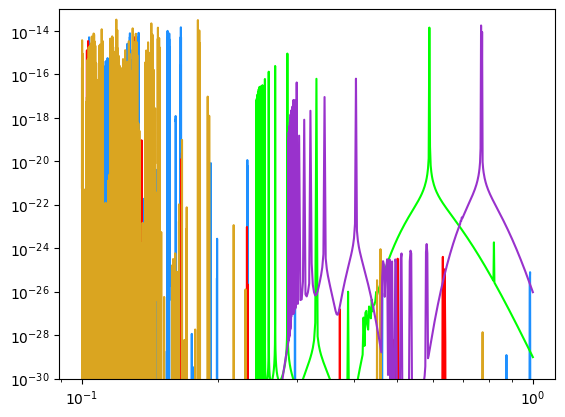

In [84]:
# Make binned_down absor dict.
bin_cross_dict = {}
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')
colors_dict = {}
for spec, color in zip(list(full_cross_dict.keys()),colors):
    colors_dict[spec] = color
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    wave, sigma, mass = full_cross_dict[spec]
    wave = np.array([i for i in list(reversed(wave))])
    sigma = np.array([i for i in list(reversed(sigma))])

    # Get binned down version, where binning elements are 0.1 AA = 0.01 nm < 300 nm, and 2 nm > 300 nm.
    lam_step = 1e-5
    bin_w, bin_sig = [],[]
    lam0 = 0.1
    j = 0
    while lam0 < 1.0:
        ok = (wave>lam0) & (wave<lam0+lam_step)
        bin_w.append(np.mean(wave[ok]))
        bin_sig.append(np.mean(sigma[ok]))
        lam0 += lam_step
        if lam0 > 0.3:
            lam_step = 2e-3
        j += 1
        if j % 10000 == 0:
            print(j, lam0, lam_step)
            j = 0

    h = scale_height(T=Teff,m=mass*amu,Omega=2*pi/(day*30))

    bin_cross_dict[spec] = [np.array(bin_w),np.array(bin_sig),h]

    plt.plot(bin_w,bin_sig,label=spec,color=colors_dict[spec])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-30,1e-13)
plt.show()
plt.close()

In [64]:
max_cross_dict = {}
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    if spec in ("Na_II","Na_III","K_II","K_III","C_III","O_II","O_III"):
        continue
    wave, sigma, mass = full_cross_dict[spec]
    wave, sigma, h = bin_cross_dict[spec]
    maxdex = np.argmax(sigma)
    bin_cross_dict[spec] = wave, sigma, mass
    max_cross_dict[spec] = wave[maxdex], sigma[maxdex], (1e-5)/2, mass
    if spec in ('Na_I','K_I'):
        ok = (wave>0.5)
        maxdex = np.argmax(sigma[ok])
        max_cross_dict[spec] = wave[ok][maxdex], sigma[ok][maxdex], 1e-3, mass
    print(max_cross_dict[spec],spec)
    
filename = 'cross-sections-bin.npy'
np.save(filename,max_cross_dict)
filename = 'cross-sections-bin-full.npy'
np.save(filename,bin_cross_dict)

Fixing cross sections...: 100%|██████████| 15/15 [00:00<00:00, 8992.93it/s]

(0.16570499776295608, 1.44671416948069e-14, 5e-06, 12.011) C_I
(0.13357499728080624, 1.2939080639535979e-14, 5e-06, 12.011) C_II
(0.13021500522088764, 5.266438562423618e-15, 5e-06, 15.999) O_I
(0.5889987859739203, 1.4049215713319528e-14, 0.001, 22.99) Na_I
(0.11918500111428285, 3.268865130954639e-14, 5e-06, 32.065) S_I
(0.1259549987382108, 1.692098459905004e-15, 5e-06, 32.065) S_II
(0.11940500255443286, 1.0483272054797522e-15, 5e-06, 32.065) S_III
(0.7669989432422857, 1.7599594635120497e-14, 0.001, 39.098) K_I


And you're done. :)

BONUS: Everything below is for generating the appendix figures.

Computing absorption...: 100%|██████████| 15/15 [00:00<00:00, 137.22it/s]


column density of C_I: 7.25E+12 cm-2
0.8950607128998722 0.16570499776295608
column density of C_II: 8.00E+12 cm-2
0.8965245337210711 0.13357499728080624
column density of O_I: 1.92E+13 cm-2
0.8986419193595562 0.13021500522088764
column density of Na_I: 7.25E+12 cm-2
0.8980921931661953 0.5889987859739203
column density of S_I: 3.16E+12 cm-2
0.8965490953542254 0.11918500111428285
column density of S_II: 5.91E+13 cm-2
0.899972166016374 0.1259549987382108
column density of S_III: 9.63E+13 cm-2
0.8990549374200539 0.11940500255443286
column density of K_I: 5.68E+12 cm-2
0.8999743127280432 0.7669989432422857


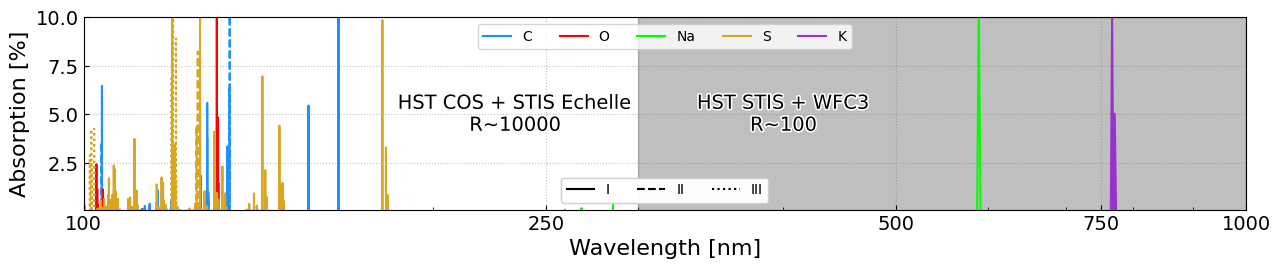

In [114]:
# Now that we have gotten n for each species, we can get f.
from matplotlib.ticker import NullFormatter as nf
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')
colors_dict = {}
for spec, color in zip(('C','O','Na','S','K'),colors):
    colors_dict[spec] = color

absorptions = {}
fig, ax = plt.subplots(figsize=(15,2.5))
ax.fill_between(x=[0.1,0.3],y1=0,y2=10,color='white',alpha=0.15)
ax.text(0.235,5,s='HST COS + STIS Echelle\nR~10000',
        ha='center',va='center',fontsize=fontsize_tick,
        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                              foreground='white')])

ax.fill_between(x=[0.3,1.0],y1=0,y2=10,color='k',alpha=0.25)
ax.text(0.4,5,s='HST STIS + WFC3\nR~100',
        ha='center',va='center',fontsize=fontsize_tick,
        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                              foreground='white')])

hands = []
for spec in tqdm(list(absorption_dict.keys()),
                desc='Computing absorption...'):
    if spec in ("Na_II","Na_III","K_II","K_III","C_III","O_II","O_III"):
        continue
    wave, sigma, h = bin_cross_dict[spec]
    ok = (wave>0.1) & (wave<1.0)
    col_dens = 1e10
    f = 1 - (sigma*col_dens)
    f[f<0] = 0
    f = np.array(f)
    while np.min(f[ok]) > 0.9: # while min abs is not yet 10%
        col_dens *= 1.05
        f = 1 - (sigma*col_dens)
        f[f<0] = 0
        f = np.array(f)
    print('column density of {}: {:.2E} cm-2'.format(spec,col_dens))
    mindex = np.argmin(f)
    print(min(f),wave[mindex])
    absorptions[spec] = 1-f

    if '_II' not in spec:
        spec = str.replace(spec,"_",'')
        spec = str.replace(spec,"I",'')
        hand, = ax.plot(wave,100*(1-f),label=spec,color=colors_dict[spec]) # plot the absorption of each species by wavelength
        hands.append(hand)
    else:
        ls = '--'
        if '_III' in spec:
            ls = ':'
        spec = str.replace(spec,"_",'')
        spec = str.replace(spec,"I",'')
        ax.plot(wave,100*(1-f),color=colors_dict[spec],ls=ls) # plot the absorption of each species by wavelength
legend1 = ax.legend(handles=hands,ncols=5,loc='upper center')
l1, = ax.plot(0,0,ls='-',label='I',color='k')
l2, = ax.plot(0,0,ls='--',label='II',color='k')
l3, = ax.plot(0,0,ls=':',label='III',color='k')
legend2 = ax.legend(handles=(l1,l2,l3), ncols=3,loc='lower center')
ax.add_artist(legend2)
ax.add_artist(legend1)

ax.set_xlabel('Wavelength [nm]',fontsize=fontsize_axis)
ax.set_ylabel('Absorption [%]',fontsize=fontsize_axis)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(0.10, 1.00)
plt.ylim(0.1,10)
#plt.yticks(ticks=[0.1,1.0,10],
#           labels=('','1.0','10.0'))
plt.xticks(ticks=[0.1,0.25,0.5,0.75,1.0],
           labels=['100','250','500','750','1000'])
ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax.xaxis.set_minor_formatter(nf())
plt.rc('grid',color='grey',alpha=0.5,ls=':')
plt.savefig('contam_lines.png',dpi=300,bbox_inches='tight')
plt.grid(zorder=1)
plt.show()
plt.close()

In [114]:
### MORE EQUATIONS ###
def instel(Teff, aoR):
    return ((Teff/5772)**4)*((aoR/215.032)**-2)

def lumin(Teff, Rs):
    return (Rs**2)*((Teff/5772)**4)

def shore(v):
    return 1e-3*(v**4)

def xuv(I,L):
    return I*(L**-0.6)

In [115]:
### PLOTTING FUNC ###
def plot_thermal_shoreline(names,vescs,instels,rps,tides,Tstar):
    # Establish the template and draw the escape lines.
    x = np.linspace(1,100,1000)
    y = np.linspace(1,10000,1000)
    xs = [6,8,10,15,20,25]
    ys = [0.1,1.0,10.0,100.0,1000.0,10000.0]

    l,h = (20,10)
    fig, ax = plt.subplots(figsize=(l,h))
    theta = 0.335*np.arctan(l/h)*180/np.pi

    shoreline = shore(x)

    ax.plot(x,shoreline,color='red',lw=3,zorder=1)
    ax.text(6.9,2.5,s='VOLATILE-DEPLETED',rotation=theta,
            color='red',weight='bold',fontsize=fontsize_tick)

    # Now start putting in the planets.
    F = 3000
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    re_size = 0.75*F*np.log10(np.square(np.array(1))+1)
    im = ax.scatter(vescs,instels,s=sizes,c=Tstar,cmap=spectral_cmap,edgecolor='blue',lw=3,vmin=2500,vmax=6000)

    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower right',borderpad=1.0,labelspacing=3.0,fontsize=fontsize_tick)

    # Label them.
    for k in range(len(names)):
        if names[k] in best:
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='blue',marker='x',lw=1)
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='None',edgecolor='blue',lw=3)
    
        
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,1e10,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='upper center',ncols=3,columnspacing=0.5,handlelength=3,borderpad=2.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xticks(xs)
    ax.set_xticklabels([str(i) for i in xs])
    ax.set_xlabel('Escape Velocity [km/s]',fontsize=fontsize_axis)    
    ax.set_xlim(6,25)
    ax.set_yticks(ys)
    ax.set_yticklabels([str(i) for i in ys])
    ax.set_ylabel('Instellation [w.r.t. Earth]',fontsize=fontsize_axis)
    for yi in ys:
        ax.axhline(y=yi,color='whitesmoke',zorder=0)
    for xi in xs:
        ax.axvline(x=xi,color='whitesmoke',zorder=0)
    ax.tick_params(axis='both',which='both',direction='in',labelsize=fontsize_tick)
    ax.set_ylim(1,10000)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)

    plt.savefig('thermal_shore.png',dpi=300,bbox_inches='tight')
    plt.close()

In [116]:
### PLOTTING FUNC ###
def plot_xuv_shoreline(names,vescs,instels,rps,tides,Tstar,rstar):
    # Establish the template and draw the escape lines.
    x = np.linspace(1,100,1000)
    y = np.linspace(1,10000,1000)
    xs = [6,8,10,15,20,25]
    ys = [0.1,1.0,10.0,100.0,1000.0,10000.0]

    l,h = (20,10)
    fig, ax = plt.subplots(figsize=(l,h))
    theta = 0.335*np.arctan(l/h)*180/np.pi

    shoreline = shore(x)

    ax.plot(x,shoreline,color='red',lw=3,zorder=1)
    ax.text(6.9,2.5,s='VOLATILE-DEPLETED',rotation=theta,
            color='red',weight='bold',fontsize=fontsize_tick)

    # Now start putting in the planets.
    F = 3000
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    re_size = 0.75*F*np.log10(np.square(np.array(1))+1)
    # Replace instels with XUV
    lumins = lumin(Tstar,rstar)
    instels = xuv(instels,lumins)
    im = ax.scatter(vescs,instels,s=sizes,c=Tstar,cmap=spectral_cmap,edgecolor='blue',lw=3,vmin=2500,vmax=6000)

    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower right',borderpad=1.0,labelspacing=3.0,fontsize=fontsize_tick)

    # Label them.
    for k in range(len(names)):
        if names[k] in best:
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='blue',marker='x',lw=1)
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='None',edgecolor='blue',lw=3)
    
        
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,1e10,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='lower center',ncols=3,columnspacing=0.5,handlelength=3,borderpad=2.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xticks(xs)
    ax.set_xticklabels([str(i) for i in xs])
    ax.set_xlabel('Escape Velocity [km/s]',fontsize=fontsize_axis)    
    ax.set_xlim(6,25)
    ax.set_yticks(ys)
    ax.set_yticklabels([str(i) for i in ys])
    ax.set_ylabel('Cumulative XUV Flux [w.r.t Earth]',fontsize=fontsize_axis)
    for yi in ys:
        ax.axhline(y=yi,color='whitesmoke',zorder=0)
    for xi in xs:
        ax.axvline(x=xi,color='whitesmoke',zorder=0)
    ax.tick_params(axis='both',which='both',direction='in',labelsize=fontsize_tick)
    ax.set_ylim(1,10000)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)

    plt.savefig('xuv_shore.png',dpi=300,bbox_inches='tight')
    plt.close()

In [117]:
new_names,vescs,instels,new_rps,check_tides,Tstar,rstar,eccs,aors,alfvens,periods = [],[],[],[],[],[],[],[],[],[],[]
for k in range(len(data)):
    try:
        if data['pl_name'][k] == "Io":
            continue
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        rs = data['st_rad'][k]
        ecc = data['pl_orbeccen'][k]
        period = data['pl_orbper'][k]
        v = vesc(m=mp*masse,r=rp*rade)/(100*1000)
        i = instel(Teff,aor)
        if alfven < aor:
            print(1/0)
        if tides != 0:
            new_names.append(data['pl_name'][k])
        else:
            print(1/0)
        vescs.append(v)
        instels.append(i)
        check_tides.append(tides)
        new_rps.append(rp)
        Tstar.append(Teff)
        rstar.append(rs)
        eccs.append(ecc)
        aors.append(aor)
        alfvens.append(alfven)
        periods.append(period*day)
    except:
        pass
plot_thermal_shoreline(new_names,np.array(vescs),np.array(instels),np.array(new_rps),np.array(check_tides),np.array(Tstar))
plot_xuv_shoreline(new_names,np.array(vescs),np.array(instels),np.array(new_rps),np.array(check_tides),np.array(Tstar),np.array(rstar))

K2-233 b had an abnormally huge mass (11.26 Earth masses with radius 1.343 Earth radii) and was discarded.
K2-233 c had an abnormally huge mass (12.81 Earth masses with radius 1.281 Earth radii) and was discarded.
Kepler-107 c had an abnormally huge mass (9.39 Earth masses with radius 1.597 Earth radii) and was discarded.
